In [1]:
import os

In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [3]:
import lib

In [4]:
os.environ["PATH"] += ":/global/common/software/nersc9/texlive/2024/bin/x86_64-linux"

In [5]:
for shear_step in lib.const.SHEAR_STEPS:
    match_filename = f"match_{shear_step}.hdf5"
    match_file = os.path.join(
        "/pscratch/sd/s/smau/y6-image-sims-matches",
        match_filename,
    )
    
    with (
        h5py.File(
            lib.const.IMSIM_CATALOGS[shear_step],
            mode="r",
        ) as hf_wide,    
        h5py.File(
            match_file,
            mode="r",
        ) as hf_match,
    ):
        wide_uid = hf_wide["mdet"]["noshear"]["uid"]
        match_uid = hf_match["mdet"]["noshear"]["uid"]

        print(
            shear_step,
            sum(~np.isnan(wide_uid)), sum(~np.isnan(match_uid)),
        )

g1_slice=0.02__g2_slice=0.00__g1_other=0.00__g2_other=0.00__zlow=0.0__zhigh=6.0 13330748 13220685
g1_slice=-0.02__g2_slice=0.00__g1_other=0.00__g2_other=0.00__zlow=0.0__zhigh=6.0 13326561 13217444
g1_slice=0.02__g2_slice=0.00__g1_other=-0.02__g2_other=0.00__zlow=0.6__zhigh=0.9 13317735 13208677
g1_slice=0.02__g2_slice=0.00__g1_other=-0.02__g2_other=0.00__zlow=1.8__zhigh=2.1 13323097 13213993
g1_slice=0.02__g2_slice=0.00__g1_other=-0.02__g2_other=0.00__zlow=0.9__zhigh=1.2 13319472 13210221
g1_slice=0.02__g2_slice=0.00__g1_other=-0.02__g2_other=0.00__zlow=2.1__zhigh=2.4 13323665 13214566
g1_slice=0.02__g2_slice=0.00__g1_other=-0.02__g2_other=0.00__zlow=0.0__zhigh=0.3 13321904 13212712
g1_slice=0.02__g2_slice=0.00__g1_other=-0.02__g2_other=0.00__zlow=1.2__zhigh=1.5 13318083 13209181
g1_slice=0.02__g2_slice=0.00__g1_other=-0.02__g2_other=0.00__zlow=2.4__zhigh=2.7 13324423 13215398
g1_slice=0.02__g2_slice=0.00__g1_other=-0.02__g2_other=0.00__zlow=0.3__zhigh=0.6 13318795 13209608
g1_slice=0.

In [6]:
wide = {}
match = {}
for shear_step in lib.const.SHEAR_STEPS:
    match_filename = f"match_{shear_step}.hdf5"
    match_file = os.path.join(
        "/pscratch/sd/s/smau/y6-image-sims-matches",
        match_filename,
    )
    
    hf_wide = h5py.File(
        lib.const.IMSIM_CATALOGS[shear_step],
        mode="r",
    )

    hf_match = h5py.File(
        match_file,
        mode="r",
    )
    
    wide[shear_step] = hf_wide["mdet"]["noshear"]
    match[shear_step] = hf_match["mdet"]["noshear"]

In [7]:
hf_mdet = h5py.File(lib.const.MDET_CATALOG, mode="r")
mdet = hf_mdet["mdet"]["noshear"]

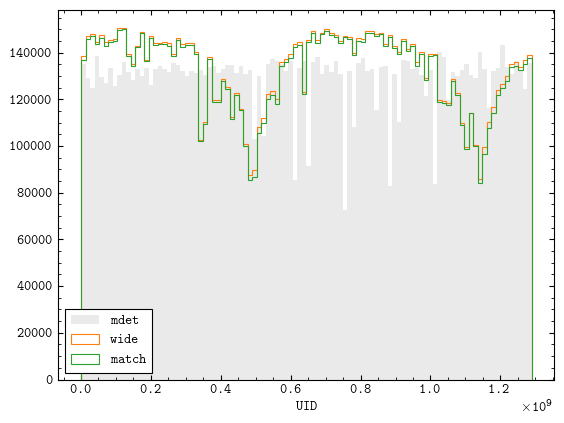

In [8]:
shear_step = lib.const.SHEAR_STEPS[1]

bins = np.linspace(
    np.min(wide[shear_step]["uid"][:]),
    np.max(wide[shear_step]["uid"][:]),
    101,
)

plt.hist(
    mdet["uid"][:],
    bins=bins,
    label="mdet",
    fc="k",
    alpha=1/12,
)


plt.hist(
    wide[shear_step]["uid"][:],
    bins=bins,
    histtype="step",
    label="wide",
)
plt.hist(
    match[shear_step]["uid"][:],
    bins=bins,
    histtype="step",
    label="match",
)
plt.legend()
plt.xlabel("UID")
plt.show()

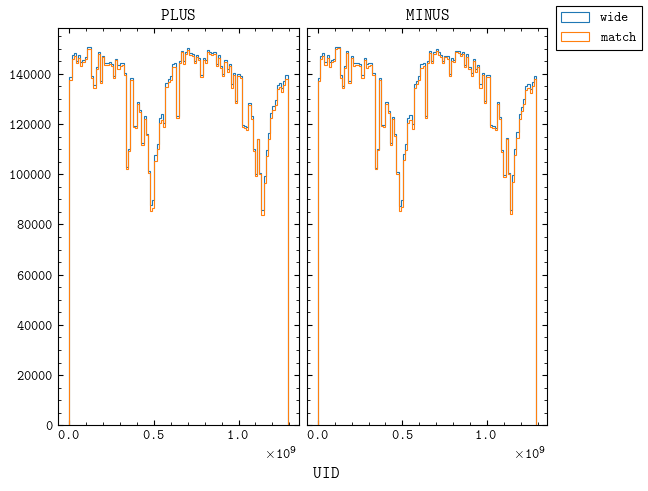

In [9]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, constrained_layout=True)

axs[0].set_title("PLUS")
axs[1].set_title("MINUS")

for i, shear_step in enumerate(lib.const.SHEAR_STEPS[:2]):
    
    bins = np.linspace(
        np.min(wide[shear_step]["uid"][:]),
        np.max(wide[shear_step]["uid"][:]),
        101,
    )
    
    axs[i].hist(
        wide[shear_step]["uid"][:],
        bins=bins,
        histtype="step",
        label="wide" if i == 0 else None,
    )
    axs[i].hist(
        match[shear_step]["uid"][:],
        bins=bins,
        histtype="step",
        label="match" if i == 0 else None,
    )
    
fig.legend(loc="outside right upper")
    
fig.supxlabel("UID")
plt.show()

In [10]:
_, wide_intersect_index, match_intersect_index = np.intersect1d(
    wide[shear_step]["uid"],
    match[shear_step]["uid"],
    return_indices=True,
)

In [11]:
uid_diff = np.setdiff1d(
    wide[shear_step]["uid"],
    match[shear_step]["uid"],
)

In [12]:
_, wide_diff_index, _ =np.intersect1d(
    wide[shear_step]["uid"],
    uid_diff,
    return_indices=True,
)

In [13]:
_col = "tilename"
print(
    _col,
    "\n",
    "success:\n\t",
    wide[shear_step][_col][:][wide_intersect_index],
    "\n",
    "failure:\n\t",
    wide[shear_step][_col][:][wide_diff_index],
    "\n",
)

tilename 
 success:
	 [b'DES0000-0250' b'DES0000-0250' b'DES0000-0250' ... b'DES2359+0001'
 b'DES2359+0001' b'DES2359+0001'] 
 failure:
	 [b'DES0000-0250' b'DES0000-0250' b'DES0000-0250' ... b'DES2359+0001'
 b'DES2359+0001' b'DES2359+0001'] 



In [14]:
unmatched_tiles = np.setdiff1d(
    wide[shear_step]["tilename"][:][wide_diff_index],
    wide[shear_step]["tilename"][:][wide_intersect_index],
)

In [15]:
shear_step = lib.const.SHEAR_STEPS[0]
print(shear_step)

g1_slice=0.02__g2_slice=0.00__g1_other=0.00__g2_other=0.00__zlow=0.0__zhigh=6.0


In [16]:
truth_match_filename = "truth-match.hdf5"
truth_match_file = os.path.join(
    "/pscratch/sd/s/smau/y6-image-sims-matches",
    truth_match_filename,
)

truth_match_table = {}

with h5py.File(
    truth_match_file,
    mode="r",
) as hf:
    for k, v in hf.items():
        truth_match_table[k] = v[:]

In [17]:
wide_table = {}

with h5py.File(
    lib.const.IMSIM_CATALOGS[shear_step],
    mode="r",
) as hf:
    for k, v in hf["mdet"]["noshear"].items():
        wide_table[k] = v[:]

In [18]:
match_filename = f"match_{shear_step}.hdf5"
match_file = os.path.join(
    "/pscratch/sd/s/smau/y6-image-sims-matches",
    match_filename,
)

match_table = {}

with h5py.File(
    match_file,
    mode="r",
) as hf:
    for k, v in hf["mdet"]["noshear"].items():
        match_table[k] = v[:]

In [19]:
assert len(wide_table["uid"]) == len(match_table["uid"])

In [20]:
sum(~np.isnan(wide_table["uid"])), sum(~np.isnan(match_table["uid"]))

(13330748, 13220685)

In [21]:
_, wide_index, match_index = np.intersect1d(
    wide_table["uid"][:],
    match_table["uid"][:],
    return_indices=True,
)

In [22]:
len(np.unique(wide_table["tilename"][wide_index]))

981

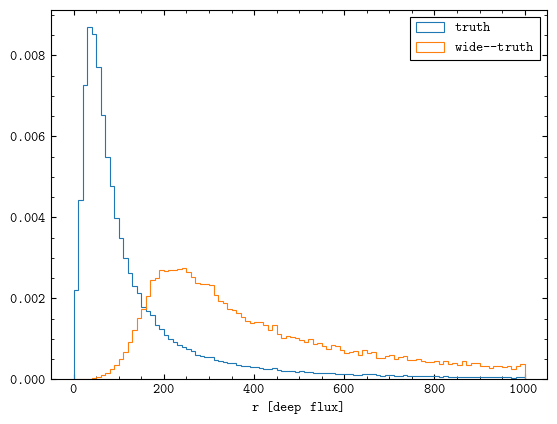

In [23]:
bins = np.linspace(0, 1000, 101)

plt.hist(
    truth_match_table["DEEP:flux_r"],
    bins=bins,
    histtype="step",
    label="truth",
    density=True,
)
plt.hist(
    match_table["DEEP:flux_r"],
    bins=bins,
    histtype="step",
    label="wide--truth",
    density=True,
)

plt.xlabel("$r$ [deep flux]")
plt.legend()
plt.show()

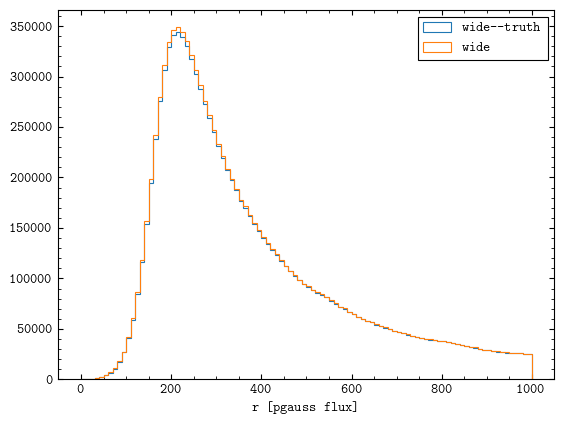

In [24]:
bins = np.linspace(0, 1000, 101)

plt.hist(
    match_table["WIDE:pgauss_flux_r"],
    bins=bins,
    histtype="step",
    label="wide--truth",
    # density=True,
)
plt.hist(
    wide_table["pgauss_band_flux_r"],
    bins=bins,
    histtype="step",
    label="wide",
    # density=True,
)

plt.xlabel("$r$ [pgauss flux]")
plt.legend()
plt.show()

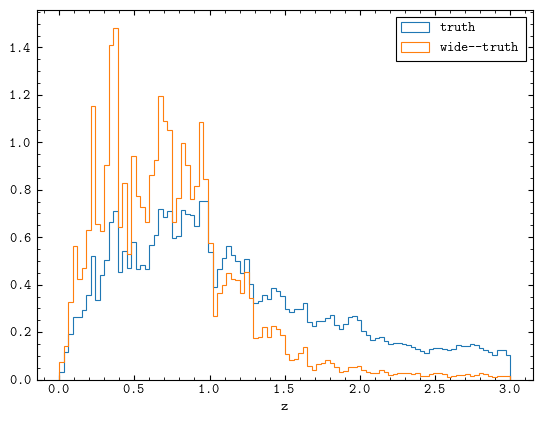

In [25]:
bins = np.linspace(0, 3, 101)

plt.hist(
    truth_match_table["z"],
    bins=bins,
    histtype="step",
    label="truth",
    density=True,
)
plt.hist(
    match_table["z"],
    bins=bins,
    histtype="step",
    label="wide--truth",
    density=True,
)
plt.xlabel("$z$")
plt.legend()
plt.show()